In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("goog1.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [4]:
df_req = df['Close']

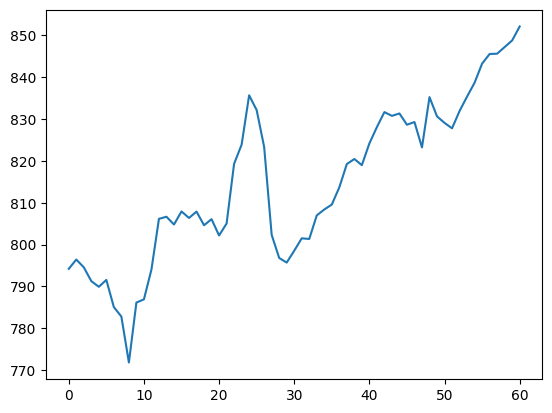

In [5]:
plt.plot(df_req)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_req = scaler.fit_transform(np.array(df_req).reshape(-1,1))

In [7]:
# Split
training_size = int(len(df_req)*0.8)
df_train = df_req[:training_size, :]
df_test = df_req[training_size:len(df_req), :]

In [8]:
def create_dataset(data, step=4):
    X = []
    y = []
    for i in range(len(data)-step):
        X.append(data[i:i+step, :])
        y.append(data[i, :])

    return np.array(X), np.array(y)

x_train, y_train = create_dataset(df_train)
x_test, y_test = create_dataset(df_test)

In [9]:
x_train

array([[[0.27870496],
        [0.30635093],
        [0.28318798],
        [0.24209223]],

       [[0.30635093],
        [0.28318798],
        [0.24209223],
        [0.22527981]],

       [[0.28318798],
        [0.24209223],
        [0.22527981],
        [0.24570341]],

       [[0.24209223],
        [0.22527981],
        [0.24570341],
        [0.16475695]],

       [[0.22527981],
        [0.24570341],
        [0.16475695],
        [0.13661236]],

       [[0.24570341],
        [0.16475695],
        [0.13661236],
        [0.        ]],

       [[0.16475695],
        [0.13661236],
        [0.        ],
        [0.17833138]],

       [[0.13661236],
        [0.        ],
        [0.17833138],
        [0.18779601]],

       [[0.        ],
        [0.17833138],
        [0.18779601],
        [0.27646347]],

       [[0.17833138],
        [0.18779601],
        [0.27646347],
        [0.42752207]],

       [[0.18779601],
        [0.27646347],
        [0.42752207],
        [0.43374872]],

       [[0

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2238
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1798 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1283 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1032 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0707 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0349 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0162 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0222 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━

In [12]:
metrics = model.evaluate(x_test, y_test)
metrics

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 0.0013


0.0012570432154461741

In [13]:
y_pred = scaler.inverse_transform(model.predict(x_test))
y_test = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


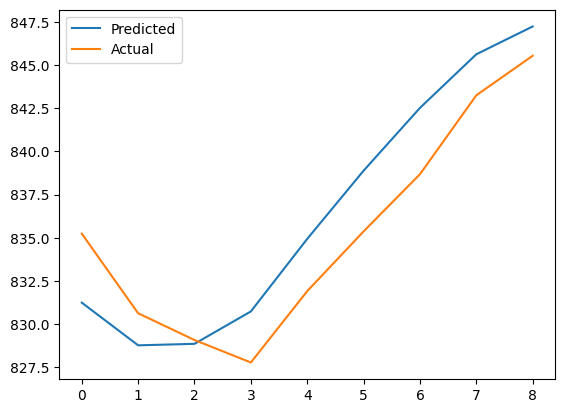

In [14]:
plt.plot(y_pred, label="Predicted")
plt.plot(y_test, label="Actual")
plt.legend()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE:  2.608574767361094
MSE:  8.105513142670722
RMSE:  2.84701828983776
